In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

# Bar Charts

In [79]:
def plot_bar_chart(dataframe: pd.DataFrame, x_column: str, y_column: str, colormap: str = 'viridis',
                   title: str = None, horizontal: bool = False, show_mean_median: bool = False,
                   show_number: bool = False) -> None:
    """
    Generate a bar chart using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the bar chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        y_column (str): The name of the column to be used for the y-axis of the chart.
        colormap (str, optional): The name of the colormap to use for coloring the bars.
                                  Default is 'viridis'.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        horizontal (bool, optional): If True, the chart will be displayed as a horizontal bar chart.
                                     Default is False (vertical bar chart).
        show_mean_median (bool, optional): If True, the mean and median values will be displayed in the top-right
                                           corner of the chart with a frame. Default is False.
        show_number (bool, optional): If True, the values of each bar will be displayed at the top of the bar.
                                      Default is False.

    Returns:
        None: The function displays the bar chart directly without returning anything.
    """

   
    df = dataframe.sort_values(by=y_column, ascending=False)

    # Create the bar plot using seaborn
    plt.figure(figsize=(12, 8))
    if horizontal:
        sns.barplot(x=df[y_column], y=df[x_column], palette=colormap)
        plt.xlabel(y_column, labelpad=15, color='#333333', fontsize=14)
        plt.ylabel(x_column, labelpad=15, color='#333333', fontsize=14)
        plt.gca().invert_yaxis()  # Invert y-axis for horizontal bar chart
        # Display values at the top of each bar if show_number is True
        if show_number:
            for index, value in enumerate(df[y_column]):
                plt.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=12, color='black')
    else:
        sns.barplot(x=df[x_column], y=df[y_column], palette=colormap)
        plt.xlabel(x_column, labelpad=15, color='#333333', fontsize=14)
        plt.ylabel(y_column, labelpad=15, color='#333333', fontsize=14)
        # Display values at the top of each bar if show_number is True
        if show_number:
            for index, value in enumerate(df[y_column]):
                plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12, color='black')

    # Display mean and median values if show_mean_median is True
    if show_mean_median:
        # Calculating mean and median
        mean_value = df[y_column].mean()
        median_value = df[y_column].median()

        # Adding mean and median values in the top-right corner of the chart with a frame
        text_to_display = f'Mean: {mean_value:.2f}\nMedian: {median_value:.2f}'
        plt.text(0.95, 0.95, text_to_display, transform=plt.gca().transAxes,
                 ha='right', va='top', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    if title:
        plt.title(title, fontweight='bold', fontsize=18, pad=15, color='#333333')

    # Remove top, right, and left spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(True)

    # Making the bottom spine gray
    plt.gca().spines['bottom'].set_color('gray')

    # Display the plot
    plt.tight_layout()  
    plt.show()



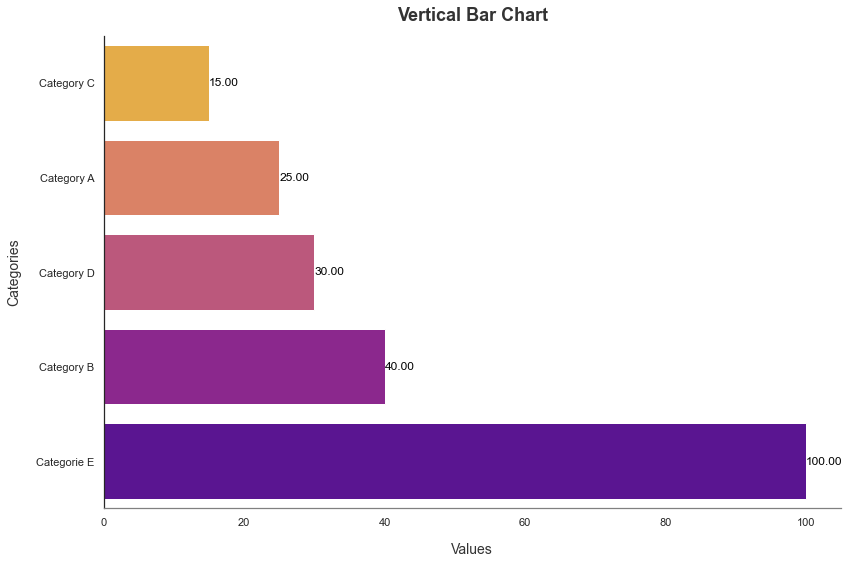

In [88]:
# Example DataFrame
data = {
    'Categories': ['Category A', 'Category B', 'Category C', 'Category D', 'Categorie E'],
    'Values': [25, 40, 15, 30, 100]
}
df = pd.DataFrame(data)
plot_bar_chart(dataframe=df, x_column='Categories', y_column='Values', colormap='plasma', title='Vertical Bar Chart', show_number=True, horizontal=True)


# Grouped Bar Chart

In [93]:
def plot_grouped_bar_chart(dataframe: pd.DataFrame, x_column: str, values_column: str, group_column: str,
                           title: str = None, horizontal: bool = False, colormap: str = 'viridis') -> None:
    """
    Generate a stacked bar chart using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the stacked bar chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        values_column (str): The name of the column to be used for the values of the stacked bars.
        group_column (str): The name of the column to be used for grouping the stacked bars.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        horizontal (bool, optional): If True, the chart will be displayed as horizontal stacked bars.
                                     If False, the chart will be displayed as vertical stacked bars (default).
        colormap (str, optional): The name of the colormap to use for coloring the bars.
                                  Default is 'viridis'.

    Returns:
        None: The function displays the stacked bar chart directly without returning anything.
    """

    # Create the stacked bar chart using Seaborn
    plt.figure(figsize=(10, 6))

    if horizontal:
        sns.barplot(data=dataframe, y=x_column, x=values_column, hue=group_column, palette=colormap)
        plt.xlabel(values_column, labelpad=15, color='#333333', fontsize=14)
        plt.ylabel(x_column, labelpad=15, color='#333333', fontsize=14)
        plt.gca().invert_yaxis()  # Invert y-axis for horizontal bar chart
    else:
        sns.barplot(data=dataframe, x=x_column, y=values_column, hue=group_column, palette=colormap)
        plt.xlabel(x_column, labelpad=15, color='#333333', fontsize=14)
        plt.ylabel(values_column, labelpad=15, color='#333333', fontsize=14)

    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Remove top, right, and left spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(True)

    # Making the bottom spine gray
    plt.gca().spines['bottom'].set_color('gray')

    # Display the plot
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.show()



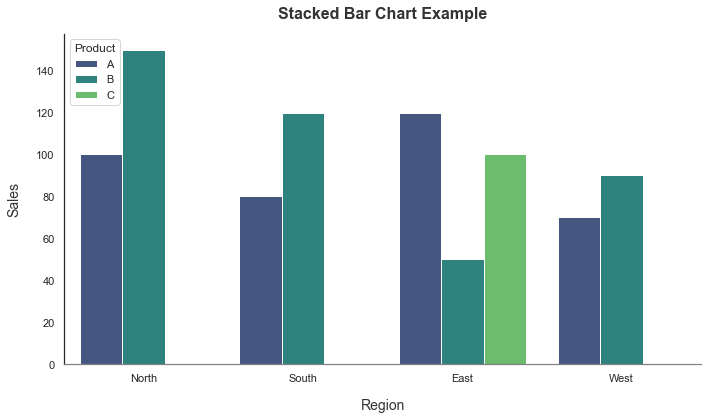

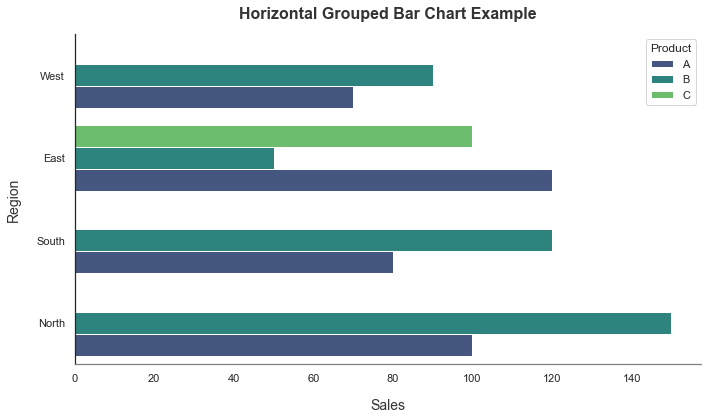

In [95]:
data = {
    'Region': ['North', 'North', 'South', 'South', 'East', 'East', 'West', 'West', 'East'],
    'Product': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'C'],
    'Sales': [100, 150, 80, 120, 120, 50, 70, 90, 100]
}

df = pd.DataFrame(data)

# Using the function to create a vertical stacked bar chart
plot_grouped_bar_chart(dataframe=df, x_column='Region', values_column='Sales', group_column='Product',
                       title='Stacked Bar Chart Example')

# Using the function to create a horizontal stacked bar chart
plot_grouped_bar_chart(dataframe=df, x_column='Region', values_column='Sales', group_column='Product',
                       title='Horizontal Grouped Bar Chart Example', horizontal=True )

# Stacked Bar chart matplotlib

In [118]:
def plot_stacked_bar_chart(dataframe: pd.DataFrame, x_column: str, values_column: str, group_column: str,
                           title: str = None, horizontal: bool = False, colormap: str = 'viridis') -> None:
    """
    Generate a stacked bar chart using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the stacked bar chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        values_column (str): The name of the column to be used for the values of the stacked bars.
        group_column (str): The name of the column to be used for grouping the stacked bars.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        horizontal (bool, optional): If True, the chart will be displayed as horizontal stacked bars.
                                     If False, the chart will be displayed as vertical stacked bars (default).
        colormap (str, optional): The name of the colormap to use for coloring the bars.
                                  Default is 'viridis'.

    Returns:
        None: The function displays the stacked bar chart directly without returning anything.
    """

    # Pivot the DataFrame to get the data in a suitable format for the stacked bar chart
    pivot_df = dataframe.pivot(index=x_column, columns=group_column, values=values_column)

    # Create the stacked bar chart using matplotlib
    plt.figure(figsize=(10, 6))

    # Generate colormap dynamically based on the number of unique categories in the group_column
    num_categories = pivot_df.shape[1]
    colormap = plt.cm.get_cmap(colormap, num_categories)

    if horizontal:
        # Plotting the horizontal stacked bars
        bottom = None
        for i, column in enumerate(pivot_df.columns):
            plt.barh(pivot_df.index, pivot_df[column], left=bottom, color=colormap(i), label=column)
            if bottom is None:
                bottom = pivot_df[column]
            else:
                bottom += pivot_df[column]

        # Adding labels and title for horizontal chart
        plt.xlabel(values_column, labelpad=15, color='#333333', fontsize=14)
        plt.ylabel(x_column, labelpad=15, color='#333333', fontsize=14)

    else:  # Vertical stacked bars (default)
        # Plotting the vertical stacked bars
        bottom = None
        for i, column in enumerate(pivot_df.columns):
            plt.bar(pivot_df.index, pivot_df[column], bottom=bottom, color=colormap(i), label=column)
            if bottom is None:
                bottom = pivot_df[column]
            else:
                bottom += pivot_df[column]

        # Adding labels and title for vertical chart
        plt.xlabel(x_column, labelpad=15, color='#333333', fontsize=14)
        plt.ylabel(values_column, labelpad=15, color='#333333', fontsize=14)

    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Adding legend
    plt.legend(pivot_df.columns)

    # Remove top, right, and left spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(True)

    # Making the bottom spine gray
    plt.gca().spines['bottom'].set_color('gray')

    # Display the plot
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.show()

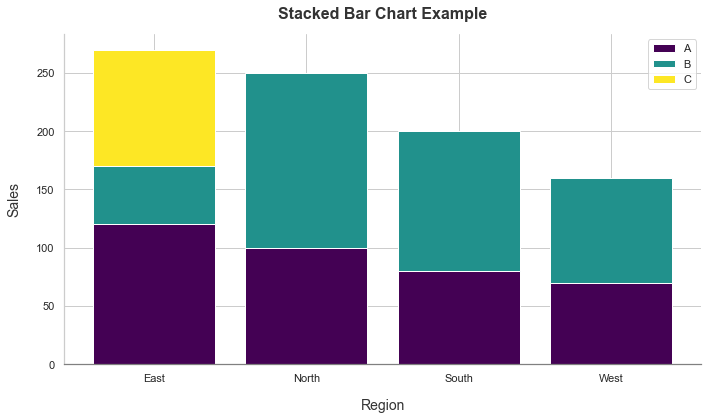

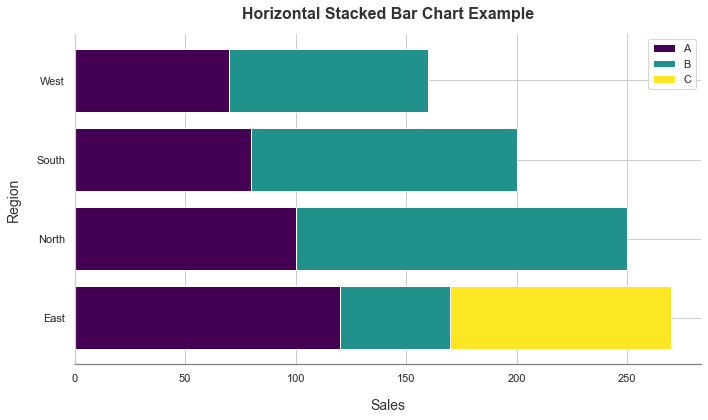

In [119]:
data = {
    'Region': ['North', 'North', 'South', 'South', 'East', 'East', 'West', 'West', 'East'],
    'Product': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'C'],
    'Sales': [100, 150, 80, 120, 120, 50, 70, 90, 100]
}

df = pd.DataFrame(data)

# Using the function to create a vertical stacked bar chart
plot_stacked_bar_chart(dataframe=df, x_column='Region', values_column='Sales', group_column='Product',
                       title='Stacked Bar Chart Example')

# Using the function to create a horizontal stacked bar chart
plot_stacked_bar_chart(dataframe=df, x_column='Region', values_column='Sales', group_column='Product',
                       title='Horizontal Stacked Bar Chart Example', horizontal=True)


# Line Chart

In [121]:
def plot_line_chart(dataframe: pd.DataFrame, x_column: str, y_columns: list, colormap: str = 'tab20',
                    title: str = None, xlabel: str = None, ylabel: str = None) -> None:
    """
    Generate a line chart with multiple lines using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the line chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        y_columns (list): The names of the columns to be used for the y-axis of the chart (multiple lines).
        colormap (str, optional): The name of the colormap to use for coloring the lines.
                                  Default is 'tab20'.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.

    Returns:
        None: The function displays the line chart directly without returning anything.
    """

    # Create the line chart using Seaborn
    plt.figure(figsize=(10, 6))

    # Generate colormap dynamically based on the number of lines to plot
    num_lines = len(y_columns)
    colormap = plt.cm.get_cmap(colormap, num_lines)

    # Use Seaborn lineplot function
    for i, column in enumerate(y_columns):
        sns.lineplot(data=dataframe, x=x_column, y=column, color=colormap(i), label=column)

    # Adding labels and title
    if xlabel:
        plt.xlabel(xlabel, labelpad=15, color='#333333', fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, labelpad=15, color='#333333', fontsize=14)
    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Adding legend
    plt.legend()

    # Remove top and right spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Display the plot
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.show()


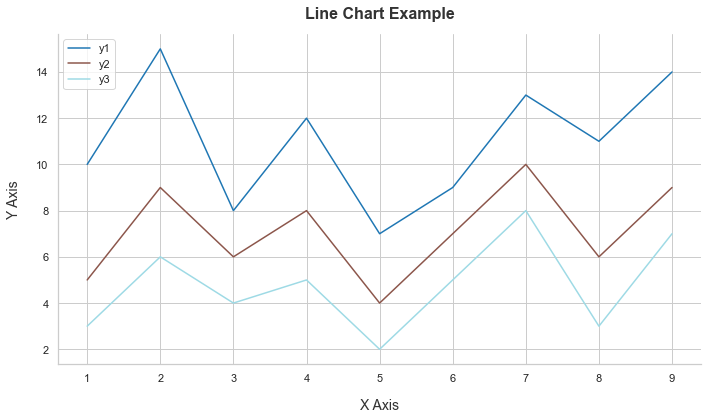

In [122]:
# Example DataFrame
data = {
    'x_column': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'y1': [10, 15, 8, 12, 7, 9, 13, 11, 14],
    'y2': [5, 9, 6, 8, 4, 7, 10, 6, 9],
    'y3': [3, 6, 4, 5, 2, 5, 8, 3, 7],
}

df = pd.DataFrame(data)

plot_line_chart(dataframe=df, x_column='x_column', y_columns=['y1', 'y2', 'y3'],
                title='Line Chart Example', xlabel='X Axis', ylabel='Y Axis')

# Scatter Plot

In [56]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [126]:
def plot_scatter_plot(dataframe: pd.DataFrame, x_column: str, y_column: str, colormap: str = 'tab20',
                      title: str = None, xlabel: str = None, ylabel: str = None, color_column: str = None) -> None:
    """
    Generate a scatter plot using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the scatter plot.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        y_column (str): The name of the column to be used for the y-axis of the chart.
        colormap (str, optional): The name of the colormap to use for coloring the data points.
                                  Default is 'tab20'.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.
        color_column (str, optional): The name of the column to be used for coloring the data points based on
                                      distinct values in this column.

    Returns:
        None: The function displays the scatter plot directly without returning anything.
    """

    # Create the scatter plot using seaborn
    plt.figure(figsize=(10, 6))

    if color_column and color_column in dataframe:
        # Get distinct categories in the color_column
        categories = dataframe[color_column].unique()
        num_categories = len(categories)

        # Generate colormap dynamically based on the number of distinct categories
        colormap = plt.cm.get_cmap(colormap, num_categories)

        # Create a dictionary to map categories to their corresponding numeric values for coloring
        color_mapping = {category: i for i, category in enumerate(categories)}

        # Map the color_column values to their numeric values for coloring
        dataframe['color'] = dataframe[color_column].map(color_mapping)

        # Plotting the scatter plot with color coding using seaborn
        scatter_plot = sns.scatterplot(data=dataframe, x=x_column, y=y_column, hue='color', palette=colormap, s=100)

        # Add labels for each category to the top right of the chart with the corresponding color indicator
        ax = plt.gca()
        for i, category in enumerate(categories):
            ax.annotate(category, xy=(1, 1), xytext=(-15, -15*(num_categories-i)), textcoords='offset points',
                        fontsize=12, color=colormap(i), ha='right', va='top')

        # Remove the temporary 'color' column from the dataframe
        dataframe.drop(columns='color', inplace=True)

        # Display the legend
        plt.legend(title='Categories')
    else:
        # If color_column is not provided or not found, use blue color for all data points
        scatter_plot = sns.scatterplot(data=dataframe, x=x_column, y=y_column, color='blue', s=100)

    # Adding labels and title
    if xlabel:
        plt.xlabel(xlabel, labelpad=15, color='#333333', fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, labelpad=15, color='#333333', fontsize=14)
    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Remove top and right spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Display the plot
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.show()


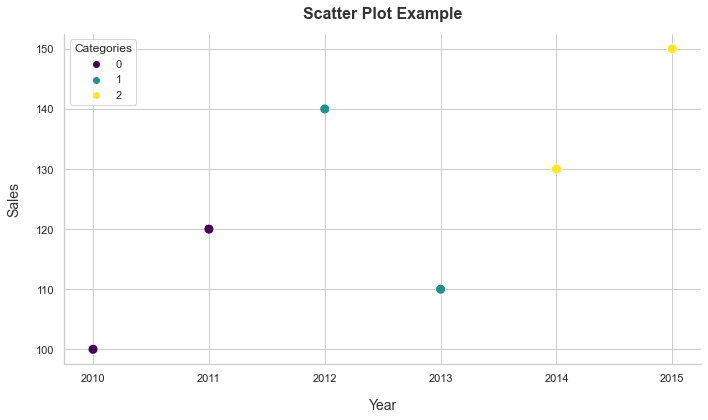

In [125]:
# Example DataFrame
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015],
    'ProductA': [100, 120, 140, 110, 130, 150],
    'ProductB': [80, 90, 95, 85, 100, 110],
    'ProductC': [70, 80, 85, 75, 90, 100],
    'Category': ['Category1', 'Category1', 'Category2', 'Category2', 'Category3', 'Category3']
}

df = pd.DataFrame(data)

# Using the function to create a scatter plot
plot_scatter_plot(dataframe=df, x_column='Year', y_column='ProductA', colormap='viridis',
                  title='Scatter Plot Example', xlabel='Year', ylabel='Sales', color_column='Category')


# Bubble Plot

# Heatmap

In [129]:
def plot_heatmap(dataframe: pd.DataFrame, x_column: str, y_column: str, values_column: str, colormap: str = 'viridis',
                 title: str = None, xlabel: str = None, ylabel: str = None):
    """
    Generate a heatmap using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the heatmap.
        x_column (str): The name of the column to be used for the x-axis of the heatmap.
        y_column (str): The name of the column to be used for the y-axis of the heatmap.
        values_column (str): The name of the column to be used for the values of the heatmap cells.
        colormap (str, optional): The name of the colormap to use for coloring the heatmap cells.
                                  Default is 'viridis'.
        title (str, optional): The title for the heatmap. If None, the heatmap will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.

    Returns:
        None: The function displays the heatmap directly without returning anything.
    """

    # Pivot the DataFrame to get the data in a suitable format for the heatmap
    pivot_df = dataframe.pivot(index=y_column, columns=x_column, values=values_column)

    # Create the heatmap using seaborn
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_df, annot=True, cmap=colormap, fmt=".1f", linewidths=0.5)

    # Adding labels and title
    if xlabel:
        plt.xlabel(xlabel, labelpad=15, color='#333333', fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, labelpad=15, color='#333333', fontsize=14)
    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Display the plot
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.show()




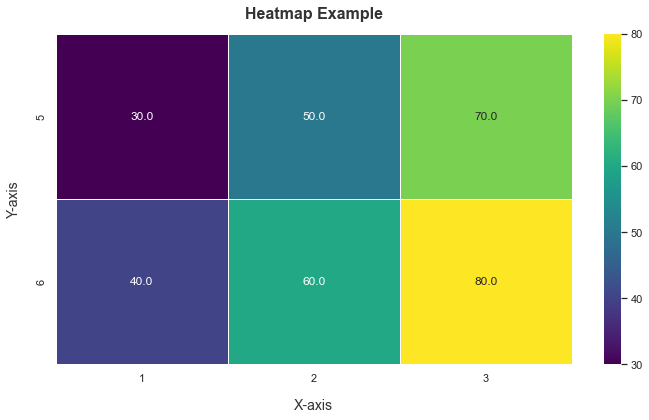

In [128]:
# Example DataFrame
data = {
    'X': [1, 1, 2, 2, 3, 3],
    'Y': [5, 6, 5, 6, 5, 6],
    'Values': [30, 40, 50, 60, 70, 80]
}

df = pd.DataFrame(data)

# Using the function to create a heatmap
plot_heatmap(dataframe=df, x_column='X', y_column='Y', values_column='Values', title='Heatmap Example',
             xlabel='X-axis', ylabel='Y-axis')

# Box Plot

In [130]:
def plot_marginal_boxplot(dataframe: pd.DataFrame, x_column: str, y_column: str,
                          title: str = None, xlabel: str = None, ylabel: str = None) -> None:
    """
    Generate a Marginal Boxplot using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the Marginal Boxplot.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        y_column (str): The name of the column to be used for the y-axis of the chart.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.

    Returns:
        None: The function displays the Marginal Boxplot directly without returning anything.
    """

    # Create the Marginal Boxplot using seaborn
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=dataframe, x=x_column, y=y_column, color='lightblue', showfliers=False)

    # Adding labels and title
    if xlabel:
        plt.xlabel(xlabel, labelpad=15, color='#333333', fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, labelpad=15, color='#333333', fontsize=14)
    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Remove top and right spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Display the plot
    plt.tight_layout()
    plt.show()


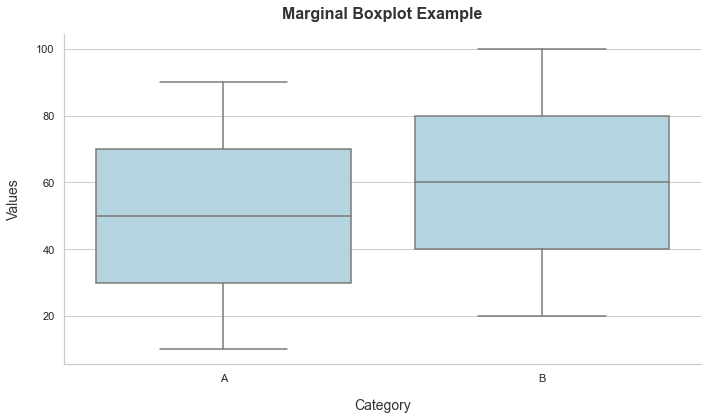

In [131]:
# Example DataFrame
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'Values': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

df = pd.DataFrame(data)

# Using the function to create a Marginal Boxplot
plot_marginal_boxplot(dataframe=df, x_column='Category', y_column='Values', title='Marginal Boxplot Example', xlabel='Category', ylabel='Values')


# Histogram

In [133]:
def plot_histogram(dataframe: pd.DataFrame, column: str, bins: int = 10,
                   colormap: str = 'viridis', title: str = None, xlabel: str = None, ylabel: str = None):
    """
    Generate a histogram using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the histogram.
        column (str): The name of the column to be used for the histogram.
        bins (int, optional): The number of bins to use for the histogram. Default is 10.
        colormap (str, optional): The name of the colormap to use for coloring the bars.
                                  Default is 'viridis'.
        title (str, optional): The title for the histogram. If None, the histogram will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.

    Returns:
        None: The function displays the histogram directly without returning anything.
    """

    # Create the histogram using seaborn
    plt.figure(figsize=(10, 6))
    sns.histplot(data=dataframe, x=column, bins=bins, color=plt.get_cmap(colormap)(0.6), edgecolor='black')

    # Adding labels and title
    if xlabel:
        plt.xlabel(xlabel, labelpad=15, color='#333333', fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, labelpad=15, color='#333333', fontsize=14)
    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Remove top and right spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Display the plot
    plt.tight_layout()
    plt.show()

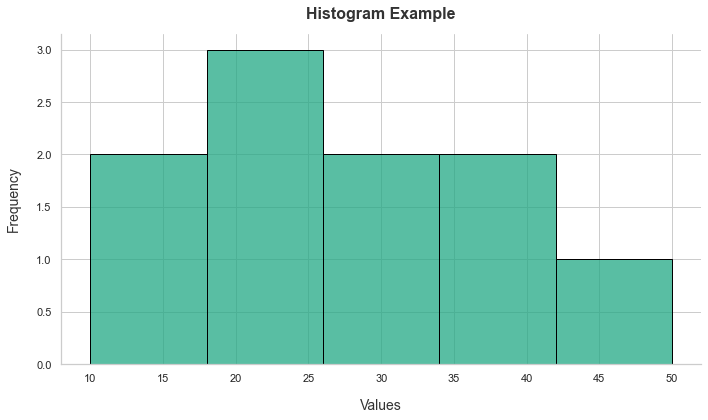

In [132]:
# Example DataFrame
data = {
    'Values': [10, 20, 30, 40, 50, 30, 25, 15, 20, 35]
}

df = pd.DataFrame(data)

# Using the function to create a histogram
plot_histogram(dataframe=df, column='Values', bins=5, colormap='viridis', title='Histogram Example',
               xlabel='Values', ylabel='Frequency')
